In [1]:
# Imported required libraries for data analysis and visualization
# =============================================================================
# pandas: For data manipulation and analysis (DataFrames, groupby, etc.)
# matplotlib: For creating static visualizations (line plots, bar charts)

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Loaded bitcoin price data from CSV and performed initial data inspection

df = pd.read_csv("data/price_of_bitcoin_from_2018_to_2025.csv")

# Display first 5 rows to see data structure and sample values
print(df.head())
print()

# Display column data types, non-null counts, and memory usage
print(df.info())

         date  avg_daily_price
0  2019-01-01        3737.6325
1  2019-01-02        3821.9000
2  2019-01-03        3804.2725
3  2019-01-04        3771.6050
4  2019-01-05        3788.2600

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2562 entries, 0 to 2561
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             2562 non-null   object 
 1   avg_daily_price  2562 non-null   float64
dtypes: float64(1), object(1)
memory usage: 40.2+ KB
None


In [3]:
# Converted columns to proper data types for analysis

# Converted 'date' column from string to datetime object for time-series operations
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

# Ensured 'avg_daily_price' is numeric (handled any string values that might exist)
df['avg_daily_price'] = pd.to_numeric(df['avg_daily_price'])

# Verify the conversions were successful
print(df[['date', 'avg_daily_price']].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2562 entries, 0 to 2561
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             2562 non-null   datetime64[ns]
 1   avg_daily_price  2562 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 40.2 KB
None


In [4]:
# Aggregated daily prices to monthly averages for trend analysis

monthly_prices = (
    df.groupby(pd.Grouper(key="date", freq="ME"))["avg_daily_price"]  # Grouped by month-end frequency
      .mean()  # Calculated the mean price for each month
      .reset_index()  # Converted Series back to DataFrame with 'date' as a column and not the index
)

monthly_prices

,date,avg_daily_price
0,2019-01-31,3644.794032
1,2019-02-28,3683.943125
2,2019-03-31,3933.908226
3,2019-04-30,5128.242750
4,2019-05-31,7233.394516
...,...,...
79,2025-08-31,114940.370473
80,2025-09-30,112961.942993
81,2025-10-31,114210.484440
82,2025-11-30,96898.732343


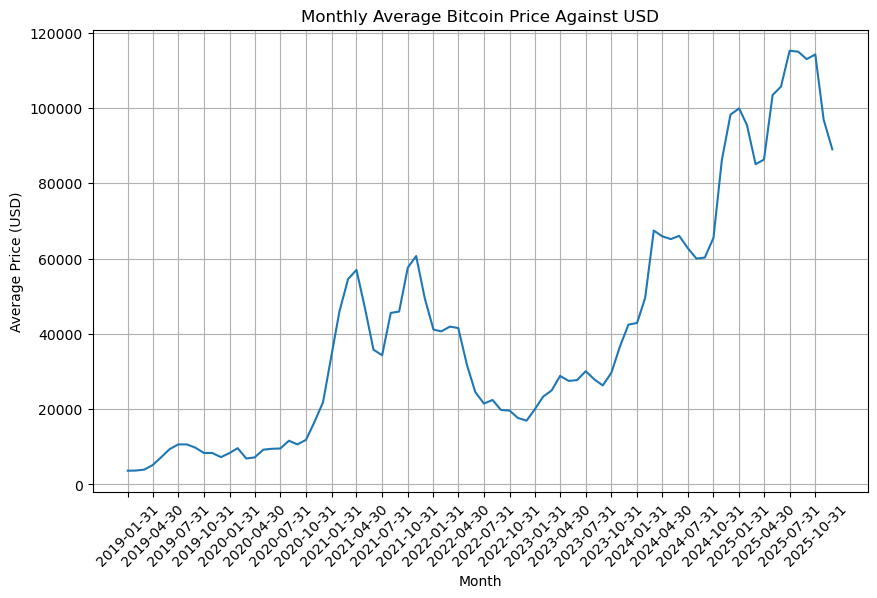

In [5]:
# Visualized the overall Bitcoin price trend from 2019 to 2025

# A line plot showing the general price movement over the entire dataset period

plt.figure(figsize=(10,6))  # Set figure size: 10 inches wide, 6 inches tall

# Plotted monthly average prices as a line chart
plt.plot(monthly_prices['date'], monthly_prices['avg_daily_price'], linestyle='-')

# Added axis labels and title
plt.xlabel('Month')
plt.ylabel('Average Price (USD)')
plt.title('Monthly Average Bitcoin Price Against USD')

# [::3] selects every 3rd date label to prevent x-axis overcrowding
plt.xticks(monthly_prices['date'][::3], rotation=45)

plt.grid(True)  # Added grid lines for easier value reading
plt.savefig("plot/trend_analysis_from_2019_to_2025.jpg")  # Saved plot as image
plt.show()

In [6]:
# Define month abbreviations for consistent x-axis labeling
# =============================================================================
# This list will be reused across all yearly plots for uniform month labels

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

## 2019
Filtered data for only 2019 records and did year-specific analysis

In [7]:
# Filtered data to extract only 2019 records for year-specific analysis

# Filtered rows where the year portion of date equals '2019'
# .astype(str) converts datetime to string, .str[:4] extracts first 4 characters (year)
annual_prices_2019 = df[df['date'].astype(str).str[:4] == '2019']

annual_prices_2019

,date,avg_daily_price
0,2019-01-01,3737.6325
1,2019-01-02,3821.9000
2,2019-01-03,3804.2725
3,2019-01-04,3771.6050
4,2019-01-05,3788.2600
...,...,...
360,2019-12-27,7202.2550
361,2019-12-28,7293.6475
362,2019-12-29,7380.0125
363,2019-12-30,7315.6675


In [8]:
# Calculated monthly average prices for 2019

# Aggregated daily prices into monthly averages for cleaner visualization
monthly_prices_2019 = (
    annual_prices_2019.groupby(pd.Grouper(key="date", freq="ME"))["avg_daily_price"]
      .mean()  # Average of all daily prices within each month
      .reset_index()  # Convert grouped Series to DataFrame
)

monthly_prices_2019

,date,avg_daily_price
0,2019-01-31,3644.794032
1,2019-02-28,3683.943125
2,2019-03-31,3933.908226
3,2019-04-30,5128.242750
4,2019-05-31,7233.394516
5,2019-06-30,9365.300750
6,2019-07-31,10639.394113
7,2019-08-31,10626.036935
8,2019-09-30,9780.585250
9,2019-10-31,8363.934839


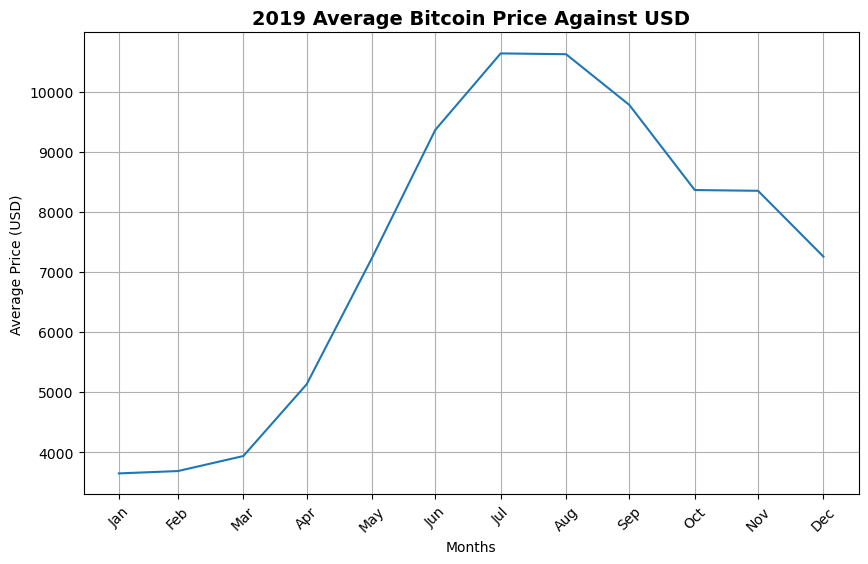

In [9]:
# Visualized Bitcoin price trend for 2019

plt.figure(figsize=(10,6))

plt.plot(monthly_prices_2019['date'], monthly_prices_2019['avg_daily_price'], linestyle='-')

plt.xlabel('Months')
plt.ylabel('Average Price (USD)')
plt.title('2019 Average Bitcoin Price Against USD', fontsize=14, fontweight='bold')

# Replace datetime ticks with month abbreviations for cleaner display
plt.xticks(ticks=monthly_prices_2019['date'], labels=months, rotation=45)

plt.grid(True)
plt.savefig("plot/trend_analysis_for_2019.jpg") # Saved the chart
# Shows monthly price movement pattern specific to 2019
plt.show()

In [10]:
# Statistical summary to find best buying (low) and selling (high) months for 2019

# Set month names as index for readable output
monthly_prices_2019.index = months

# Sort by price ascending to easily identify lowest and highest months
sorted_2019 = monthly_prices_2019.sort_values('avg_daily_price', ascending=True)

print('The months with the lowest prices of Bitcoin are: ')
print('Month Avg_Daily_Price')
# iloc[0:3, 1] selects rows 0-2 (3 lowest), column index 1 (avg_daily_price)
print(sorted_2019.iloc[0:3, 1])

print('\nThe months with the highest prices of Bitcoin are: ')
print('Month Avg_Daily_Price')
# iloc[9:12, 1] selects rows 9-11 (3 highest), [::-1] reverses to show highest first
print(sorted_2019.iloc[9:12, 1][::-1])

The months with the lowest prices of Bitcoin are: 
Month Avg_Daily_Price
Jan    3644.794032
Feb    3683.943125
Mar    3933.908226
Name: avg_daily_price, dtype: float64

The months with the highest prices of Bitcoin are: 
Month Avg_Daily_Price
Jul    10639.394113
Aug    10626.036935
Sep     9780.585250
Name: avg_daily_price, dtype: float64


## 2020
Filtered data for only 2022 records and did year-specific analysis

In [11]:
# Filtered data to extract only 2020 records for year-specific analysis

# Filtered rows where the year portion of date equals '2020'
# .astype(str) converts datetime to string, .str[:4] extracts first 4 characters (year)
annual_prices_2020 = df[df['date'].astype(str).str[:4] == '2020']

annual_prices_2020

,date,avg_daily_price
365,2020-01-01,7206.5600
366,2020-01-02,7075.9300
367,2020-01-03,7146.6225
368,2020-01-04,7343.8300
369,2020-01-05,7381.4850
...,...,...
726,2020-12-27,26724.2650
727,2020-12-28,26740.4875
728,2020-12-29,26938.6050
729,2020-12-30,28144.1350


In [12]:
# Calculated monthly average prices for 2020

# Aggregated daily prices into monthly averages for cleaner visualization
monthly_prices_2020 = (
    annual_prices_2020.groupby(pd.Grouper(key="date", freq="ME"))["avg_daily_price"]
      .mean()  # Average of all daily prices within each month
      .reset_index()  # Convert grouped Series to DataFrame
)

monthly_prices_2020

,date,avg_daily_price
0,2020-01-31,8336.842742
1,2020-02-29,9638.490431
2,2020-03-31,6886.050968
3,2020-04-30,7180.095000
4,2020-05-31,9236.219355
5,2020-06-30,9469.032417
6,2020-07-31,9552.328710
7,2020-08-31,11618.965081
8,2020-09-30,10639.125750
9,2020-10-31,11831.530242


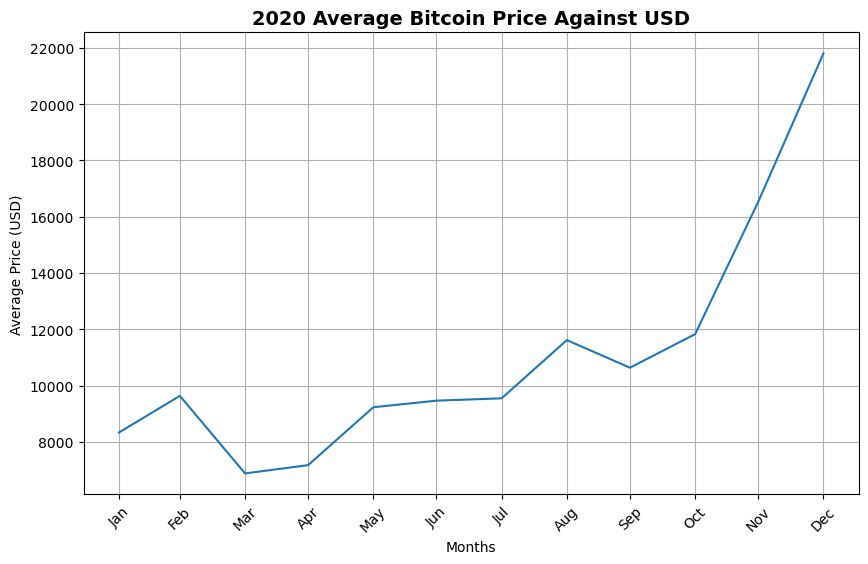

In [13]:
# Visualized Bitcoin price trend for 2020

plt.figure(figsize=(10,6))

plt.plot(monthly_prices_2020['date'], monthly_prices_2020['avg_daily_price'], linestyle='-')

plt.xlabel('Months')
plt.ylabel('Average Price (USD)')
plt.title('2020 Average Bitcoin Price Against USD', fontsize=14, fontweight='bold')

# Replace datetime ticks with month abbreviations for cleaner display
plt.xticks(ticks=monthly_prices_2020['date'], labels=months, rotation=45)

plt.grid(True)
plt.savefig("plot/trend_analysis_for_2020.jpg")  # Saved the chart
# Shows monthly price movement pattern specific to 2020
plt.show()

In [14]:
# Statistical summary to find best buying (low) and selling (high) months for 2020

# Set month names as index for readable output
monthly_prices_2020.index = months

# Sort by price ascending to easily identify lowest and highest months
sorted_2020 = monthly_prices_2020.sort_values('avg_daily_price', ascending=True)

print('The months with the lowest prices of Bitcoin are: ')
print('Month Avg_Daily_Price')
# iloc[0:3, 1] selects rows 0-2 (3 lowest), column index 1 (avg_daily_price)
print(sorted_2020.iloc[0:3, 1])

print('\nThe months with the highest prices of Bitcoin are: ')
print('Month Avg_Daily_Price')
# iloc[9:12, 1] selects rows 9-11 (3 highest), [::-1] reverses to show highest first
print(sorted_2020.iloc[9:12, 1][::-1])

The months with the lowest prices of Bitcoin are: 
Month Avg_Daily_Price
Mar    6886.050968
Apr    7180.095000
Jan    8336.842742
Name: avg_daily_price, dtype: float64

The months with the highest prices of Bitcoin are: 
Month Avg_Daily_Price
Dec    21799.474355
Nov    16530.489083
Oct    11831.530242
Name: avg_daily_price, dtype: float64


## 2021
Filtered data for only 2021 records and did year-specific analysis

In [15]:
# Filtered data to extract only 2021 records for year-specific analysis

# Filtered rows where the year portion of date equals '2021'
annual_prices_2021 = df[df['date'].astype(str).str[:4] == '2021']

annual_prices_2021

,date,avg_daily_price
731,2021-01-01,29119.9725
732,2021-01-02,30939.1400
733,2021-01-03,32979.4000
734,2021-01-04,31679.6900
735,2021-01-05,32549.8200
...,...,...
1091,2021-12-27,51003.4800
1092,2021-12-28,49065.5600
1093,2021-12-29,47061.1175
1094,2021-12-30,46846.3825


In [16]:
# Calculated monthly average prices for 2021

# Aggregated daily prices into monthly averages for cleaner visualization
monthly_prices_2021 = (
    annual_prices_2021.groupby(pd.Grouper(key="date", freq="ME"))["avg_daily_price"]
      .mean()  # Average of all daily prices within each month
      .reset_index()  # Convert grouped Series to DataFrame
)

monthly_prices_2021

,date,avg_daily_price
0,2021-01-31,34516.085000
1,2021-02-28,45971.595357
2,2021-03-31,54552.690887
3,2021-04-30,56987.503000
4,2021-05-31,46627.696613
5,2021-06-30,35793.233250
6,2021-07-31,34306.628065
7,2021-08-31,45561.165726
8,2021-09-30,45917.746500
9,2021-10-31,57588.143468


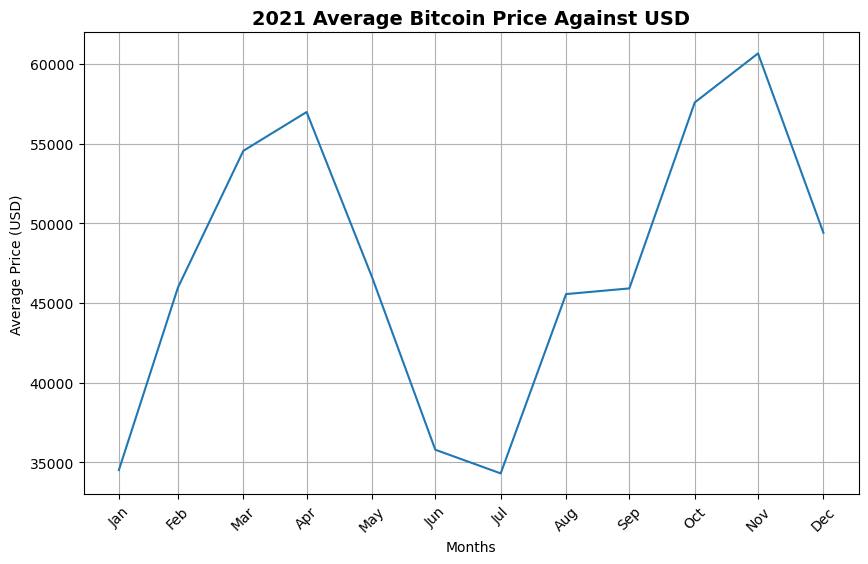

In [17]:
# Visualized Bitcoin price trend for 2021

plt.figure(figsize=(10,6))

plt.plot(monthly_prices_2021['date'], monthly_prices_2021['avg_daily_price'], linestyle='-')

plt.xlabel('Months')
plt.ylabel('Average Price (USD)')
plt.title('2021 Average Bitcoin Price Against USD', fontsize=14, fontweight='bold')

# Replace datetime ticks with month abbreviations for cleaner display
plt.xticks(ticks=monthly_prices_2021['date'], labels=months, rotation=45)

plt.grid(True)
plt.savefig("plot/trend_analysis_for_2021.jpg")  # Saved the chart
# Shows monthly price movement pattern specific to 2021
plt.show()

In [18]:
# Statistical summary to find best buying (low) and selling (high) months for 2021

# Set month names as index for readable output
monthly_prices_2021.index = months

# Sort by price ascending to easily identify lowest and highest months
sorted_2021 = monthly_prices_2021.sort_values('avg_daily_price', ascending=True)

print('The months with the lowest prices of Bitcoin are: ')
print('Month Avg_Daily_Price')
# iloc[0:3, 1] selects rows 0-2 (3 lowest), column index 1 (avg_daily_price)
print(sorted_2021.iloc[0:3, 1])

print('\nThe months with the highest prices of Bitcoin are: ')
print('Month Avg_Daily_Price')
# iloc[9:12, 1] selects rows 9-11 (3 highest), [::-1] reverses to show highest first
print(sorted_2021.iloc[9:12, 1][::-1])

The months with the lowest prices of Bitcoin are: 
Month Avg_Daily_Price
Jul    34306.628065
Jan    34516.085000
Jun    35793.233250
Name: avg_daily_price, dtype: float64

The months with the highest prices of Bitcoin are: 
Month Avg_Daily_Price
Nov    60666.930000
Oct    57588.143468
Apr    56987.503000
Name: avg_daily_price, dtype: float64


## 2022
Filtered data for only 2022 records and did year-specific analysis

In [19]:
# Filtered rows where the year portion of date equals '2022'
annual_prices_2022 = df[df['date'].astype(str).str[:4] == '2022']

annual_prices_2022

,date,avg_daily_price
1096,2022-01-01,47025.6450
1097,2022-01-02,47413.2100
1098,2022-01-03,46749.5700
1099,2022-01-04,46333.9125
1100,2022-01-05,44713.2850
...,...,...
1456,2022-12-27,16797.7375
1457,2022-12-28,16625.9725
1458,2022-12-29,16583.5275
1459,2022-12-30,16562.8250


In [20]:
# Calculated monthly average prices for 2022

# Aggregated daily prices into monthly averages for cleaner visualization
monthly_prices_2022 = (
    annual_prices_2022.groupby(pd.Grouper(key="date", freq="ME"))["avg_daily_price"]
      .mean()  # Average of all daily prices within each month
      .reset_index()  # Convert grouped Series to DataFrame
)

monthly_prices_2022

,date,avg_daily_price
0,2022-01-31,41142.644919
1,2022-02-28,40656.518929
2,2022-03-31,41920.453387
3,2022-04-30,41537.293917
4,2022-05-31,31782.954758
5,2022-06-30,24538.223750
6,2022-07-31,21485.367419
7,2022-08-31,22436.464677
8,2022-09-30,19785.834667
9,2022-10-31,19623.172097


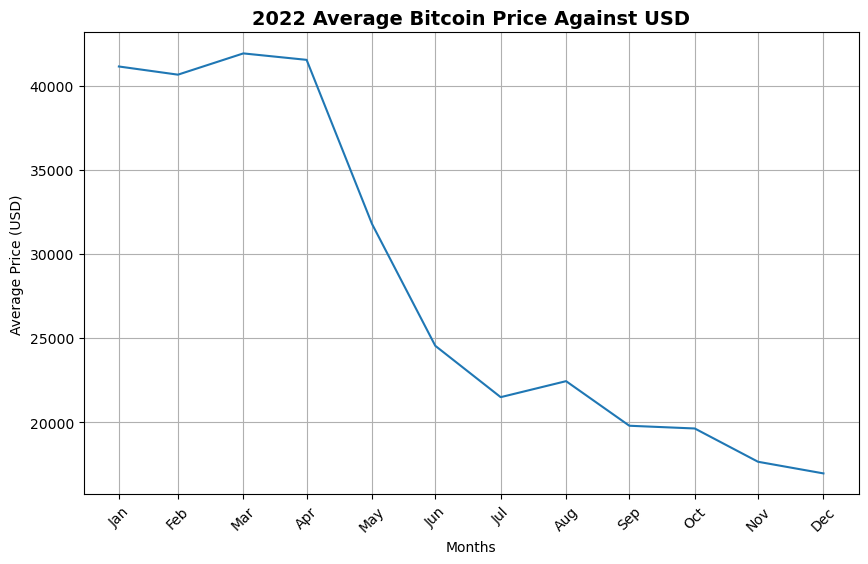

In [21]:
# Visualized Bitcoin price trend for 2022

plt.figure(figsize=(10,6))

plt.plot(monthly_prices_2022['date'], monthly_prices_2022['avg_daily_price'], linestyle='-')

plt.xlabel('Months')
plt.ylabel('Average Price (USD)')
plt.title('2022 Average Bitcoin Price Against USD', fontsize=14, fontweight='bold')

# Replace datetime ticks with month abbreviations for cleaner display
plt.xticks(ticks=monthly_prices_2022['date'], labels=months, rotation=45)

plt.grid(True)
plt.savefig("plot/trend_analysis_for_2022.jpg")  # Saved the chart
# Shows monthly price movement pattern specific to 2022
plt.show()

In [22]:
# Statistical summary to find best buying (low) and selling (high) months for 2022

# Set month names as index for readable output
monthly_prices_2022.index = months

# Sort by price ascending to easily identify lowest and highest months
sorted_2022 = monthly_prices_2022.sort_values('avg_daily_price', ascending=True)

print('The months with the lowest prices of Bitcoin are: ')
print('Month Avg_Daily_Price')
# iloc[0:3, 1] selects rows 0-2 (3 lowest), column index 1 (avg_daily_price)
print(sorted_2022.iloc[0:3, 1])

print('\nThe months with the highest prices of Bitcoin are: ')
print('Month Avg_Daily_Price')
# iloc[9:12, 1] selects rows 9-11 (3 highest), [::-1] reverses to show highest first
print(sorted_2022.iloc[9:12, 1][::-1])

The months with the lowest prices of Bitcoin are: 
Month Avg_Daily_Price
Dec    16952.705000
Nov    17644.628333
Oct    19623.172097
Name: avg_daily_price, dtype: float64

The months with the highest prices of Bitcoin are: 
Month Avg_Daily_Price
Mar    41920.453387
Apr    41537.293917
Jan    41142.644919
Name: avg_daily_price, dtype: float64


## 2023
Filtered data for only 2023 records and did year-specific analysis

In [23]:
# Filtered rows where the year portion of date equals '2023'
annual_prices_2023 = df[df['date'].astype(str).str[:4] == '2023']

annual_prices_2023

,date,avg_daily_price
1461,2023-01-01,16571.3825
1462,2023-01-02,16659.4925
1463,2023-01-03,16682.9100
1464,2023-01-04,16792.6350
1465,2023-01-05,16828.7575
...,...,...
1821,2023-12-27,42928.3675
1822,2023-12-28,43005.4950
1823,2023-12-29,42260.4275
1824,2023-12-30,42084.9600


In [24]:
# Calculated monthly average prices for 2023

# Aggregated daily prices into monthly averages for cleaner visualization
monthly_prices_2023 = (
    annual_prices_2023.groupby(pd.Grouper(key="date", freq="ME"))["avg_daily_price"]
      .mean()  # Average of all daily prices within each month
      .reset_index()  # Convert grouped Series to DataFrame
)

monthly_prices_2023

,date,avg_daily_price
0,2023-01-31,20147.680242
1,2023-02-28,23294.950268
2,2023-03-31,24996.232823
3,2023-04-30,28828.355667
4,2023-05-31,27501.344516
5,2023-06-30,27710.621250
6,2023-07-31,30083.569516
7,2023-08-31,27894.606371
8,2023-09-30,26300.363500
9,2023-10-31,29664.385806


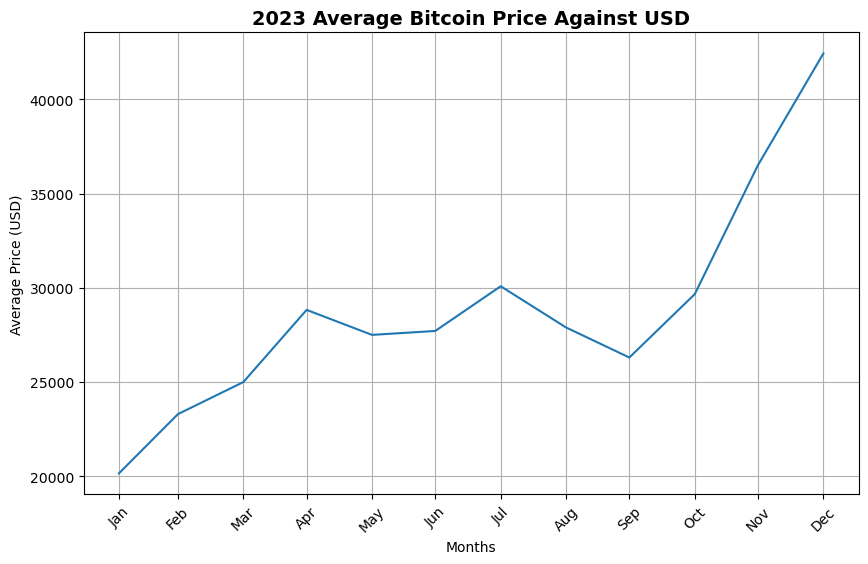

In [25]:
# Visualized Bitcoin price trend for 2023

plt.figure(figsize=(10,6))

plt.plot(monthly_prices_2023['date'], monthly_prices_2023['avg_daily_price'], linestyle='-')

plt.xlabel('Months')
plt.ylabel('Average Price (USD)')
plt.title('2023 Average Bitcoin Price Against USD', fontsize=14, fontweight='bold')

# Replace datetime ticks with month abbreviations for cleaner display
plt.xticks(ticks=monthly_prices_2023['date'], labels=months, rotation=45)

plt.grid(True)
plt.savefig("plot/trend_analysis_for_2023.jpg")  # Saved the chart
# Shows monthly price movement pattern specific to 2023
plt.show()

In [26]:
# Statistical summary to find best buying (low) and selling (high) months for 2023

# Set month names as index for readable output
monthly_prices_2023.index = months

# Sort by price ascending to easily identify lowest and highest months
sorted_2023 = monthly_prices_2023.sort_values('avg_daily_price', ascending=True)

print('The months with the lowest prices of Bitcoin are: ')
print('Month Avg_Daily_Price')
# iloc[0:3, 1] selects rows 0-2 (3 lowest), column index 1 (avg_daily_price)
print(sorted_2023.iloc[0:3, 1])

print('\nThe months with the highest prices of Bitcoin are: ')
print('Month Avg_Daily_Price')
# iloc[9:12, 1] selects rows 9-11 (3 highest), [::-1] reverses to show highest first
print(sorted_2023.iloc[9:12, 1][::-1])

The months with the lowest prices of Bitcoin are: 
Month Avg_Daily_Price
Jan    20147.680242
Feb    23294.950268
Mar    24996.232823
Name: avg_daily_price, dtype: float64

The months with the highest prices of Bitcoin are: 
Month Avg_Daily_Price
Dec    42445.352742
Nov    36519.370000
Jul    30083.569516
Name: avg_daily_price, dtype: float64


## 2024
Filtered data for only 2024 records and did year-specific analysis

In [27]:
# Filtered rows where the year portion of date equals '2024'
annual_prices_2024 = df[df['date'].astype(str).str[:4] == '2024']

annual_prices_2024

,date,avg_daily_price
1826,2024-01-01,43207.0000
1827,2024-01-02,44788.6075
1828,2024-01-03,43510.5350
1829,2024-01-04,43584.9200
1830,2024-01-05,43775.9175
...,...,...
2187,2024-12-27,95283.8050
2188,2024-12-28,94867.1700
2189,2024-12-29,94346.9300
2190,2024-12-30,93271.2975


In [28]:
# Calculated monthly average prices for 2024

# Aggregated daily prices into monthly averages for cleaner visualization
monthly_prices_2024 = (
    annual_prices_2024.groupby(pd.Grouper(key="date", freq="ME"))["avg_daily_price"]
      .mean()  # Average of all daily prices within each month
      .reset_index()  # Convert grouped Series to DataFrame
)

monthly_prices_2024

,date,avg_daily_price
0,2024-01-31,42887.823468
1,2024-02-29,49537.897586
2,2024-03-31,67432.874839
3,2024-04-30,65920.747583
4,2024-05-31,65164.082903
5,2024-06-30,66026.899833
6,2024-07-31,62754.457016
7,2024-08-31,59986.465242
8,2024-09-30,60260.581000
9,2024-10-31,65505.450968


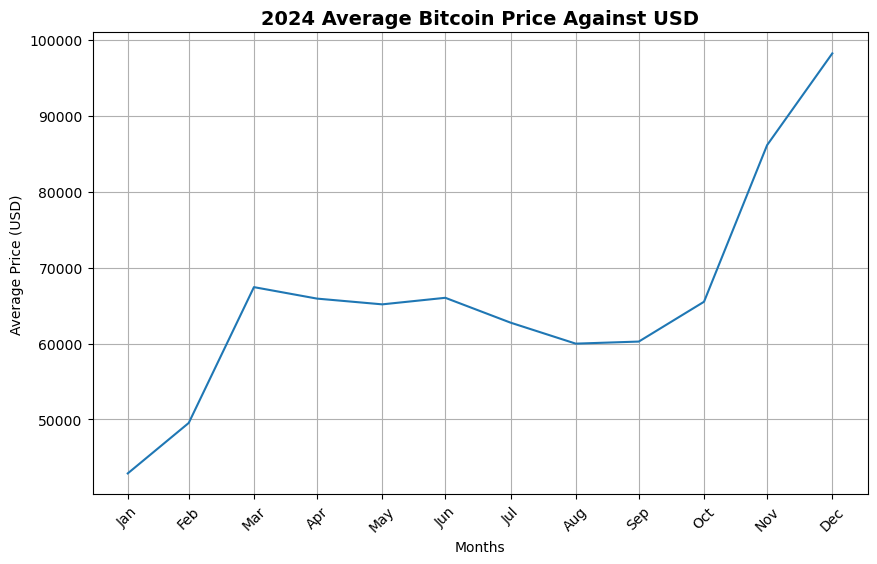

In [29]:
# Visualized Bitcoin price trend for 2024

plt.figure(figsize=(10,6))

plt.plot(monthly_prices_2024['date'], monthly_prices_2024['avg_daily_price'], linestyle='-')

plt.xlabel('Months')
plt.ylabel('Average Price (USD)')
plt.title('2024 Average Bitcoin Price Against USD', fontsize=14, fontweight='bold')

# Replace datetime ticks with month abbreviations for cleaner display
plt.xticks(ticks=monthly_prices_2024['date'], labels=months, rotation=45)

plt.grid(True)
plt.savefig("plot/trend_analysis_for_2024.jpg")  # Saved the chart
# Shows monthly price movement pattern specific to 2024
plt.show()

In [30]:
# Statistical summary to find best buying (low) and selling (high) months for 2024

# Set month names as index for readable output
monthly_prices_2024.index = months

# Sort by price ascending to easily identify lowest and highest months
sorted_2024 = monthly_prices_2024.sort_values('avg_daily_price', ascending=True)

print('The months with the lowest prices of Bitcoin are: ')
print('Month Avg_Daily_Price')
# iloc[0:3, 1] selects rows 0-2 (3 lowest), column index 1 (avg_daily_price)
print(sorted_2024.iloc[0:3, 1])

print('\nThe months with the highest prices of Bitcoin are: ')
print('Month Avg_Daily_Price')
# iloc[9:12, 1] selects rows 9-11 (3 highest), [::-1] reverses to show highest first
print(sorted_2024.iloc[9:12, 1][::-1])

The months with the lowest prices of Bitcoin are: 
Month Avg_Daily_Price
Jan    42887.823468
Feb    49537.897586
Aug    59986.465242
Name: avg_daily_price, dtype: float64

The months with the highest prices of Bitcoin are: 
Month Avg_Daily_Price
Dec    98232.176694
Nov    86147.148917
Mar    67432.874839
Name: avg_daily_price, dtype: float64


## 2025
Filtered data for only 2025 records and did year-specific analysis

In [31]:
# Filtered rows where the year portion of date equals '2025'
annual_prices_2025 = df[df['date'].astype(str).str[:4] == '2025']

annual_prices_2025

,date,avg_daily_price
2192,2025-01-01,94051.735000
2193,2025-01-02,95952.017500
2194,2025-01-03,97558.972500
2195,2025-01-04,98171.972500
2196,2025-01-05,98174.440000
...,...,...
2557,2025-12-27,87305.956560
2558,2025-12-28,87807.003211
2559,2025-12-29,87822.908291
2560,2025-12-30,87156.562661


In [32]:
# Calculated monthly average prices for 2025

# Aggregated daily prices into monthly averages for cleaner visualization
monthly_prices_2025 = (
    annual_prices_2025.groupby(pd.Grouper(key="date", freq="ME"))["avg_daily_price"]
      .mean()  # Average of all daily prices within each month
      .reset_index()  # Convert grouped Series to DataFrame
)

monthly_prices_2025

,date,avg_daily_price
0,2025-01-31,99874.964194
1,2025-02-28,95470.211250
2,2025-03-31,85061.425645
3,2025-04-30,86276.124000
4,2025-05-31,103422.910323
5,2025-06-30,105670.501167
6,2025-07-31,115195.637661
7,2025-08-31,114940.370473
8,2025-09-30,112961.942993
9,2025-10-31,114210.484440


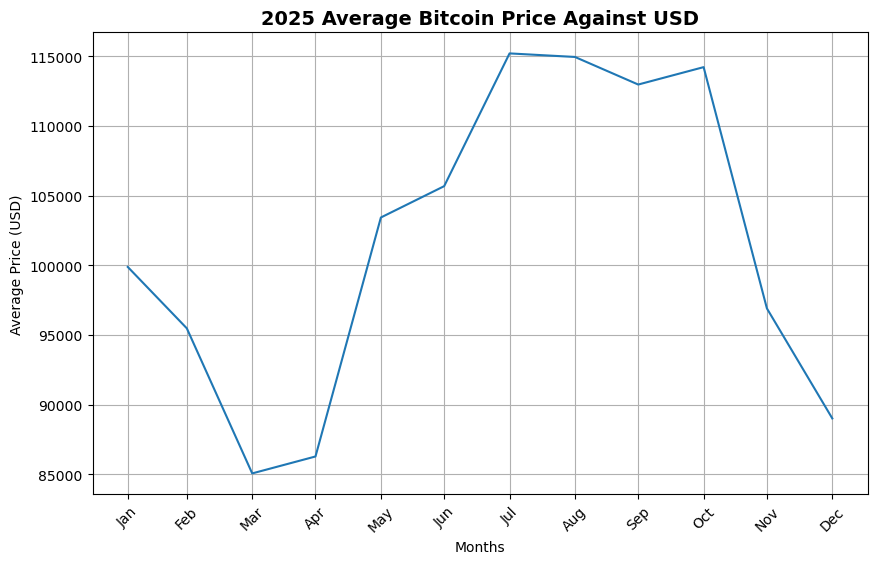

In [33]:
# Visualized Bitcoin price trend for 2025

plt.figure(figsize=(10,6))

plt.plot(monthly_prices_2025['date'], monthly_prices_2025['avg_daily_price'], linestyle='-')

plt.xlabel('Months')
plt.ylabel('Average Price (USD)')
plt.title('2025 Average Bitcoin Price Against USD', fontsize=14, fontweight='bold')

# Replace datetime ticks with month abbreviations for cleaner display
plt.xticks(ticks=monthly_prices_2025['date'], labels=months, rotation=45)

plt.grid(True)
plt.savefig("plot/trend_analysis_for_2025.jpg")  # Saved the chart
# Shows monthly price movement pattern specific to 2025
plt.show()

In [34]:
# Statistical summary to find best buying (low) and selling (high) months for 2025

# Set month names as index for readable output
monthly_prices_2025.index = months

# Sort by price ascending to easily identify lowest and highest months
sorted_2025 = monthly_prices_2025.sort_values('avg_daily_price', ascending=True)

print('The months with the lowest prices of Bitcoin are: ')
print('Month Avg_Daily_Price')
# iloc[0:3, 1] selects rows 0-2 (3 lowest), column index 1 (avg_daily_price)
print(sorted_2025.iloc[0:3, 1])

print('\nThe months with the highest prices of Bitcoin are: ')
print('Month Avg_Daily_Price')
# iloc[9:12, 1] selects rows 9-11 (3 highest), [::-1] reverses to show highest first
print(sorted_2025.iloc[9:12, 1][::-1])

The months with the lowest prices of Bitcoin are: 
Month Avg_Daily_Price
Mar    85061.425645
Apr    86276.124000
Dec    89006.476648
Name: avg_daily_price, dtype: float64

The months with the highest prices of Bitcoin are: 
Month Avg_Daily_Price
Jul    115195.637661
Aug    114940.370473
Oct    114210.484440
Name: avg_daily_price, dtype: float64


## Seasonal and Historical Analysis
Prepared data for cross-year seasonal and historical analysis and created a visualization for each of them

In [35]:
# Ensured date column is datetime type (may be redundant but ensures consistency)
df['date'] = pd.to_datetime(df['date'])

# Extracted year as integer (e.g., 2019, 2020, etc.)
df['year'] = df['date'].dt.year

# Extracted full month name (e.g., 'January', 'February', etc.)
df['month_name'] = df['date'].dt.month_name()

# Get array of unique years in the dataset for iteration
unique_years = df['year'].unique()

In [36]:
# Found which months historically have the lowest Bitcoin prices
# =============================================================================
# This identifies seasonal patterns - which months tend to have "buying opportunities"

# List to collect the 3 lowest-price months from each year
lowest_months_counter = []

for year in unique_years:
    # Filtered data for the current year in the loop
    year_data = df[df['year'] == year]
    
    # Calculated average price for each month within this year
    monthly_avg = year_data.groupby('month_name')['avg_daily_price'].mean()
    
    # Get the 3 months with lowest average prices using nsmallest()
    # .index.tolist() extracts month names as a list
    bottom_3 = monthly_avg.nsmallest(3).index.tolist()
    
    # Add these months to our running list
    lowest_months_counter.extend(bottom_3)

# Count how many times each month appeared as one of the 3 lowest
lowest_months_frequency = pd.Series(lowest_months_counter).value_counts()

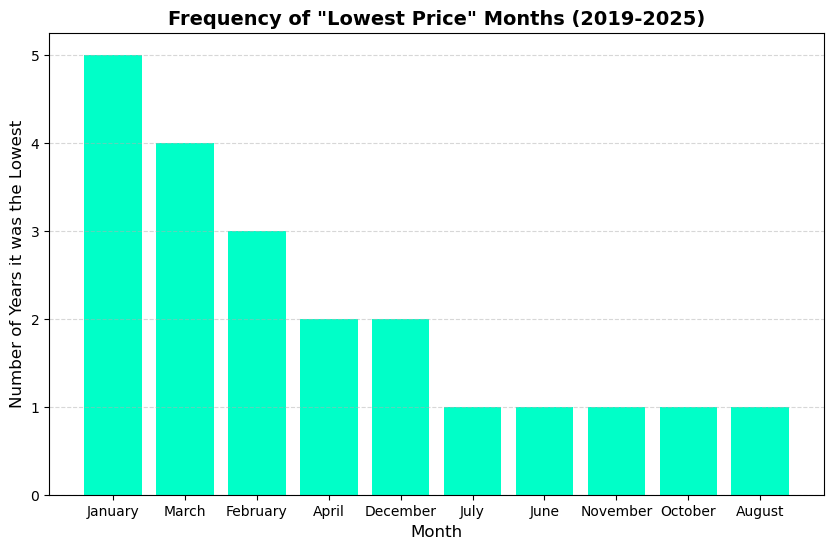

In [37]:
# Visualized the frequency of "lowest price" months across all years

plt.figure(figsize=(10, 6))

# Created a bar chart with Bitnob brand color
bars = plt.bar(lowest_months_frequency.index, lowest_months_frequency.values, color="#00ffc8")

# Added a descriptive labels
plt.title('Frequency of "Lowest Price" Months (2019-2025)', fontsize=14, fontweight='bold')
plt.ylabel('Number of Years it was the Lowest', fontsize=12)
plt.xlabel('Month', fontsize=12)

# Added a horizontal grid lines for easier value reading
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Saved with high resolution (300 dpi) and tight bounding box to remove excess whitespace
plt.savefig('plot/low_price_frequency.png', dpi=300, bbox_inches='tight')
# Displayed the bar chart showing which months most often have the lowest Bitcoin prices
plt.show() 

In [38]:
# Found which months historically have the highest Bitcoin prices
# =============================================================================
# This identifies seasonal patterns - which months tend to be "selling opportunities"

# List to collect the 3 highest-price months from each year
highest_months_counter = []

for year in unique_years:
    # Filtered data for the current year in the loop
    year_data = df[df['year'] == year]
    
    # Calculated average price for each month within this year
    monthly_avg = year_data.groupby('month_name')['avg_daily_price'].mean()
    
    # Got the 3 months with highest average prices using nlargest()
    # .index.tolist() extracts month names as a list
    top_3 = monthly_avg.nlargest(3).index.tolist()
    
    # Added these months to our running list
    highest_months_counter.extend(top_3)

# Counted how many times each month appeared as one of the 3 highest
highest_months_frequency = pd.Series(highest_months_counter).value_counts()
highest_months_frequency

November     4
July         3
December     3
October      3
August       2
March        2
April        2
September    1
January      1
Name: count, dtype: int64

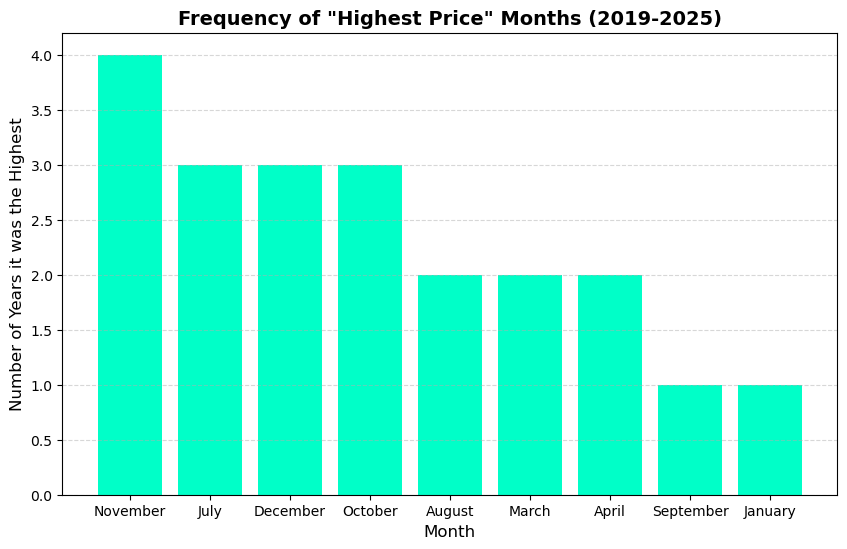

In [39]:
# Visualized the frequency of "highest price" months across all years

plt.figure(figsize=(10, 6))

# Created bar chart with Bitnob brand color
bars = plt.bar(highest_months_frequency.index, highest_months_frequency.values, color="#00ffc8")

# Added descriptive labels
plt.title('Frequency of "Highest Price" Months (2019-2025)', fontsize=14, fontweight='bold')
plt.ylabel('Number of Years it was the Highest', fontsize=12)
plt.xlabel('Month', fontsize=12)

# Added horizontal grid lines for easier value reading
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Saved with high resolution (300 dpi) and tight bounding box to remove excess whitespace
plt.savefig('plot/high_price_frequency.png', dpi=300, bbox_inches='tight')
# Displayed the bar chart showing which months most often have the highest Bitcoin prices
plt.show()

In [40]:

# Extracted month as integer (1=January, 2=February, ..., 12=December)
df['month_num'] = df['date'].dt.month

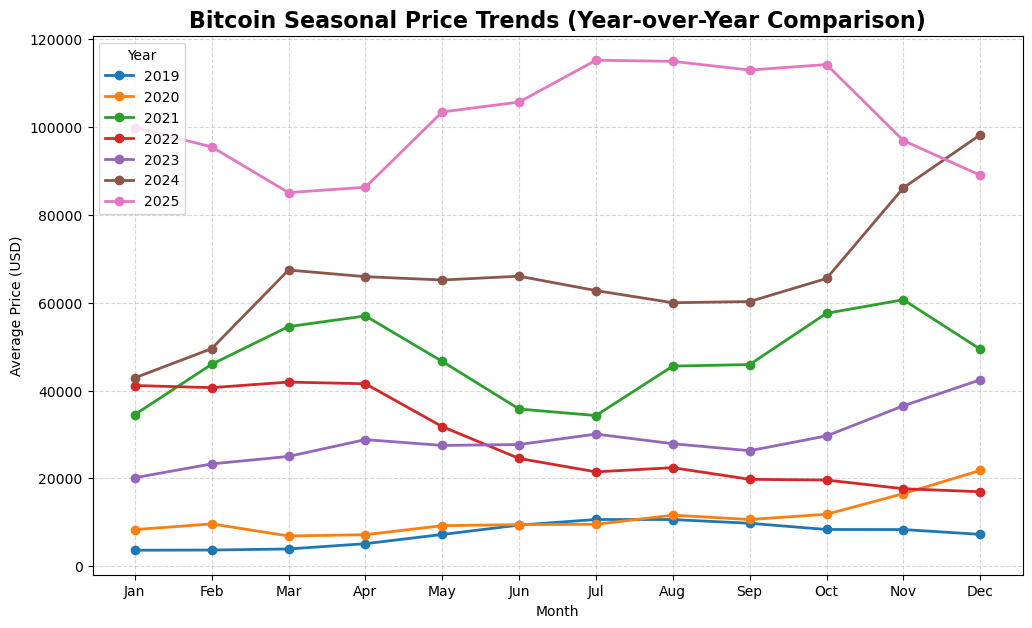

In [41]:
# Created year-over-year seasonal comparison chart
# =============================================================================
# This visualization shows how Bitcoin prices vary by month across different years
# Useful for identifying recurring seasonal patterns in price movements

# Created pivot table: rows=months (1-12), columns=years, values=average price
# aggfunc='mean' calculates average price for each month-year combination
pivot_data = df.pivot_table(index='month_num', columns='year', values='avg_daily_price', aggfunc='mean')

# Created figure with larger size to accommodate legend
plt.figure(figsize=(12, 7))

# Plotted a separate line for each year, enabling year-over-year comparison
for year in pivot_data.columns:
    plt.plot(pivot_data.index, pivot_data[year], marker='o', linewidth=2, label=str(year))

# Added labels and styling
plt.title('Bitcoin Seasonal Price Trends (Year-over-Year Comparison)', fontsize=16, fontweight='bold')
plt.ylabel('Average Price (USD)')
plt.xlabel('Month')

# Replaced numeric month ticks (1-12) with month abbreviations for readability
plt.xticks(ticks=range(1, 13), labels=months)

# Added legend to identify which line represents which year
plt.legend(title="Year", loc='upper left')

# Added grid for easier value reading
plt.grid(True, linestyle='--', alpha=0.5)

# Saved the final comparison chart
plt.savefig('plot/month_over_month_trends.png', dpi=300, bbox_inches='tight')
plt.show()